In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 999)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read in all CSV files and join into single dataframe.

In [4]:
import os
import glob
filenames = [i for i in glob.glob('data/*.csv')]

data = []

for f in filenames:
    df = pd.read_csv(f)
    df["filename"] = f
    df["city"] = f[5:-4].replace('_', ' ')
    data.append(df)
    
data = pd.concat(data, ignore_index=True)
    
data.shape

(104359, 76)

# Remove duplicate records.

In [5]:
data = data[data.duplicated("picture_url", keep="first") == False]
data.shape

(100778, 76)

# Remove records without downloaded images.

In [4]:
images = set(i.split("\\")[-1] for i in glob.glob('images/*'))
data = data[data["picture_url"].apply(lambda url: url.split("/")[-1] in images)]
data.shape

(93256, 76)

In [5]:
data.sample()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,filename,city
25728,43895848,https://www.airbnb.com/rooms/43895848,20210207181900,2021-02-09,Modern Home Near Burbank,Enjoy a quiet night's rest in a charming space fully renovated to adhere to a modern and luxurio...,NaN,https://a0.muscache.com/pictures/d205c88a-6068-4422-8dcb-dc8fae386190.jpg,250312632,https://www.airbnb.com/users/show/250312632,Hoss,2019-03-21,"Hidden Hills, California, United States","Follow and tag us on IG @airbnbofca\n\nHello, my name is Hoss. I've worked in real estate my ent...",within an hour,98%,99%,f,https://a0.muscache.com/im/pictures/user/c3f81eb3-c879-485a-84d6-b7987924b816.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/c3f81eb3-c879-485a-84d6-b7987924b816.jpg?aki_policy=pro...,Mission - Foothill,77.000,77.000,"['email', 'phone', 'offline_government_id', 'selfie', 'government_id']",t,t,NaN,Pacoima,City of Los Angeles,34.245,-118.417,Entire house,Entire home/apt,6,NaN,2 baths,3.000,5.000,"[""Microwave"", ""Coffee maker"", ""Smoke alarm"", ""Refrigerator"", ""Oven"", ""Stove"", ""Washer"", ""Cooking...",$149.00,2,30,2.000,2.000,1125.000,1125.000,2.000,1125.000,NaN,t,7,34,64,64,2021-02-09,30,30,2,2020-06-24,2021-01-24,95.000,10.000,9.000,10.000,10.000,10.000,10.000,HSR20-000950,t,47,28,19,0,3.900,data\los_angeles.csv,los angeles


# Drop irrelevant columns.

In [7]:
data.drop(columns=["id", 
                   "calendar_updated", 
                   "host_about", 
                   "neighborhood_overview", 
                   "host_neighbourhood", 
                   "description", 
                   "host_location", 
                   "host_thumbnail_url", 
                   "host_picture_url", 
                   "host_name", 
                   "maximum_maximum_nights", 
                   "minimum_maximum_nights", 
                   "maximum_minimum_nights", 
                   "minimum_minimum_nights", 
                   "name", 
                   "host_id", 
                   "scrape_id", 
                   "host_verifications", 
                   "latitude", 
                   "longitude", 
                   "minimum_nights_avg_ntm", 
                   "maximum_nights_avg_ntm", 
                   "listing_url", 
                   "calendar_last_scraped", 
                   "license", 
                   "neighbourhood", 
                   "availability_30", 
                   "availability_60", 
                   "availability_365", 
                   "number_of_reviews_ltm", 
                   "host_url", 
                   "host_response_rate", 
                   "calculated_host_listings_count", 
                   'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms',
                   'host_total_listings_count',
                   'filename'
                   ], inplace=True)

In [8]:
data.isna().sum().to_frame().sort_values(0, ascending=False)

,0
bathrooms,100778
host_response_time,35873
neighbourhood_group_cleansed,29864
host_acceptance_rate,27617
review_scores_value,24733
review_scores_location,24726
review_scores_checkin,24723
review_scores_accuracy,24694
review_scores_communication,24692
review_scores_cleanliness,24680


# One-hot encode cities.

In [8]:
data = pd.concat([data, pd.get_dummies(data["city"]).astype("category")], axis=1)
data.drop(columns=["city"], inplace=True)

# One-hot encode amenities.

In [9]:
import re

def replace_str(col, orig, rep):
    col = col.apply(lambda k: [re.sub("(^|.*\s)" + orig + "($|\s.*)", rep, s) for s in k])
    return col

In [10]:
data.dropna(subset=["amenities"], inplace=True)
data.amenities = data.amenities.apply(lambda k: [s.replace('"','').strip().lower() for s in k[1:-1].split('", "')])
data.amenities = replace_str(data.amenities, "hdtv", "tv")
data.amenities = replace_str(data.amenities, "tv", "tv")
data.amenities = replace_str(data.amenities, "wifi", "wifi")
data.amenities = replace_str(data.amenities, "dishwasher", "dishwasher")

In [11]:
amens = (data.amenities.explode().value_counts()/data.shape[0]).to_frame().reset_index(0)
amens = amens.rename(columns={'index':"amenity", 'amenities':"freq"})
relevant_amens = amens.loc[(amens["freq"] > 0.1) & (amens["freq"] < 0.9)]
relevant_amens

,amenity,freq
6,kitchen,0.880
7,hangers,0.818
8,carbon monoxide alarm,0.789
9,air conditioning,0.764
10,hair dryer,0.747
11,shampoo,0.730
12,iron,0.724
13,dedicated workspace,0.700
14,hot water,0.660
15,washer,0.620


In [12]:
for amen in relevant_amens["amenity"]:
    col_name = amen.replace(" ", "_")
    data[col_name] = data.amenities.apply(lambda l: 1 if amen in l else 0).astype("category")
data.drop(columns=["amenities"], inplace=True)

In [13]:
data.sample(5)

,last_scraped,picture_url,host_since,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,boston,cambridge,chicago,los angeles,nashville,new york city,san francisco,seattle,kitchen,hangers,carbon_monoxide_alarm,air_conditioning,hair_dryer,shampoo,iron,dedicated_workspace,hot_water,washer,dryer,refrigerator,dishes_and_silverware,fire_extinguisher,microwave,coffee_maker,cooking_basics,stove,oven,bed_linens,free_street_parking,first_aid_kit,private_entrance,free_parking_on_premises,extra_pillows_and_blankets,dishwasher,patio_or_balcony,garden_or_backyard,luggage_dropoff_allowed,lock_on_bedroom_door,elevator,lockbox,bathtub,indoor_fireplace,gym,keypad,shower_gel,host_greets_you,bbq_grill,pool
33194,2021-02-06,https://a0.muscache.com/pictures/aaef7f0c-d72b-4ac4-a61e-ac3e245f9783.jpg,2015-11-02,within a day,NaN,f,0.000,t,f,East Harlem,Manhattan,Entire apartment,Entire home/apt,2,NaN,1 bath,1.000,1.000,$120.00,30,1125,t,90,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19402,2021-02-10,https://a0.muscache.com/pictures/c98489e2-9e44-4c05-9efd-e0082e95c705.jpg,2019-05-30,NaN,0%,f,0.000,f,f,Hollywood Hills West,City of Los Angeles,Entire villa,Entire home/apt,12,NaN,6.5 baths,6.000,6.000,"$5,284.00",30,365,t,88,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6133,2021-02-09,https://a0.muscache.com/pictures/4c506aaa-60ca-4604-a513-1f02ac179f52.jpg,2012-08-08,NaN,71%,t,1.000,t,t,Long Beach,Other Cities,Private room in house,Private room,3,NaN,1 bath,1.000,1.000,$65.00,2,20,t,70,102,0,2016-06-12,2020-03-02,95.000,10.000,10.000,10.000,10.000,10.000,10.000,t,1.800,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1795,2021-02-05,https://a0.muscache.com/pictures/a1a0fecc-6d07-499e-8e30-9e24ce222a98.jpg,2015-06-21,within an hour,100%,t,3.000,t,t,Outer Richmond,NaN,Private room in house,Private room,2,NaN,1 shared bath,1.000,1.000,$69.00,3,30,t,74,90,0,2016-03-19,2020-08-29,94.000,10.000,10.000,10.000,10.000,10.000,10.000,f,1.510,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1631,2021-02-04,https://a0.muscache.com/pictures/27e2cd74-664d-4ee8-8272-7af652291831.jpg,2015-12-03,NaN,NaN,t,2.000,t,t,Castro/Upper Market,NaN,Entire apartment,Entire home/apt,5,NaN,1.5 baths,2.000,2.000,$128.00,30,1125,t,0,2,0,2016-08-13,2017-09-04,100.000,10.000,10.000,10.000,10.000,10.000,10.000,f,0.040,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Other data cleaning.

In [14]:
for col in ["host_is_superhost", "host_identity_verified", "has_availability", "instant_bookable", "host_has_profile_pic"]:
    data[col] = data[col].replace({'f': 0, 't': 1}).astype("category")

In [15]:
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype('float') / 100

In [16]:
data["price"] = data["price"].replace({'\$':'', ',':''}, regex=True).astype('float')

In [17]:
data.sample(5)

,last_scraped,picture_url,host_since,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,boston,cambridge,chicago,los angeles,nashville,new york city,san francisco,seattle,kitchen,hangers,carbon_monoxide_alarm,air_conditioning,hair_dryer,shampoo,iron,dedicated_workspace,hot_water,washer,dryer,refrigerator,dishes_and_silverware,fire_extinguisher,microwave,coffee_maker,cooking_basics,stove,oven,bed_linens,free_street_parking,first_aid_kit,private_entrance,free_parking_on_premises,extra_pillows_and_blankets,dishwasher,patio_or_balcony,garden_or_backyard,luggage_dropoff_allowed,lock_on_bedroom_door,elevator,lockbox,bathtub,indoor_fireplace,gym,keypad,shower_gel,host_greets_you,bbq_grill,pool
10522,2021-02-09,https://a0.muscache.com/pictures/357bd7ec-77d8-46b9-bf05-633dcd769934.jpg,2016-11-18,within an hour,0.980,0.000,8.000,1.000,1.000,Venice,City of Los Angeles,Entire condominium,Entire home/apt,2,NaN,1 bath,1.000,1.000,105.000,3,180,1,71,128,2,2017-10-09,2021-01-20,95.000,10.000,10.000,10.000,10.000,10.000,10.000,1,3.150,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18491,2021-02-09,https://a0.muscache.com/pictures/2de712b6-fbcf-4a95-b9ef-150346eeb87e.jpg,2016-06-06,within an hour,0.500,0.000,1.000,1.000,0.000,Koreatown,City of Los Angeles,Entire house,Entire home/apt,6,NaN,3 baths,3.000,3.000,650.000,3,42,1,83,4,0,2019-06-10,2020-08-02,100.000,10.000,10.000,10.000,10.000,10.000,10.000,0,0.200,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1
5371,2021-02-05,https://a0.muscache.com/pictures/dc29c805-f3d2-419b-9d9c-2e4d6923d893.jpg,2019-10-18,NaN,1.000,0.000,6.000,1.000,1.000,Downtown/Civic Center,NaN,Room in boutique hotel,Private room,2,NaN,1 private bath,1.000,1.000,228.000,1,28,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
27358,2021-02-04,https://a0.muscache.com/pictures/ecc99c7b-0030-4cfd-95cf-e44ac5f63d50.jpg,2017-05-25,NaN,1.000,0.000,0.000,1.000,1.000,Chinatown,Manhattan,Entire apartment,Entire home/apt,2,NaN,1 bath,1.000,1.000,70.000,2,14,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
355,2021-02-19,https://a0.muscache.com/pictures/63893679/65161f4a_original.jpg,2015-01-05,NaN,0.000,1.000,1.000,1.000,1.000,Rogers Park,NaN,Private room in apartment,Private room,2,NaN,1 shared bath,1.000,1.000,48.000,3,90,1,83,47,0,2015-02-21,2019-09-24,94.000,10.000,9.000,10.000,10.000,9.000,10.000,0,0.640,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
data["host_response_time"].unique()

array(['within a day', nan, 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [19]:
def encode_reponse_time(s):
    if s == 'within an hour':
        return 1
    elif s == 'within a few hours':
        return 2
    elif s == 'within a day':
        return 3
    elif s == 'a few days or more':
        return 4
    else:
        return 0
data["host_response_time"] = data["host_response_time"].apply(lambda s: encode_reponse_time(s)).astype(int)
    

In [20]:
data["last_scraped"] = pd.to_datetime(data["last_scraped"])
data["host_since"] = pd.to_datetime(data["host_since"])
data["first_review"] = pd.to_datetime(data["first_review"])
data["last_review"] = pd.to_datetime(data["last_review"])

In [21]:
data["days_hosting"] = (data["last_scraped"] - data["host_since"]).dt.days
data["days_since_first_review"] = (data["last_scraped"] - data["first_review"]).dt.days
data["days_since_last_review"] = (data["last_scraped"] - data["last_review"]).dt.days
data.drop(columns=["last_scraped", "host_since", "first_review", "last_review"], inplace=True)

In [22]:
data.sample(5)

,picture_url,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,boston,cambridge,chicago,los angeles,nashville,new york city,san francisco,seattle,kitchen,hangers,carbon_monoxide_alarm,air_conditioning,hair_dryer,shampoo,iron,dedicated_workspace,hot_water,washer,dryer,refrigerator,dishes_and_silverware,fire_extinguisher,microwave,coffee_maker,cooking_basics,stove,oven,bed_linens,free_street_parking,first_aid_kit,private_entrance,free_parking_on_premises,extra_pillows_and_blankets,dishwasher,patio_or_balcony,garden_or_backyard,luggage_dropoff_allowed,lock_on_bedroom_door,elevator,lockbox,bathtub,indoor_fireplace,gym,keypad,shower_gel,host_greets_you,bbq_grill,pool,days_hosting,days_since_first_review,days_since_last_review
22693,https://a0.muscache.com/pictures/a272d358-59df-4796-85a6-f19e6712ea45.jpg,1,0.990,0.000,9.000,1.000,1.000,Throgs Neck,Bronx,Private room in house,Private room,2,NaN,1 shared bath,1.000,1.000,50.000,30,1125,1,90,25,0,86.000,9.000,9.000,9.000,9.000,9.000,9.000,1,1.050,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1229.000,714.000,117.000
25505,https://a0.muscache.com/pictures/9f429557-682a-48f4-a343-9d8d0c1c1c9f.jpg,1,0.970,0.000,23.000,1.000,1.000,Glendale,Other Cities,Entire house,Entire home/apt,7,NaN,1.5 baths,2.000,3.000,214.000,2,1125,1,79,3,1,100.000,10.000,10.000,10.000,10.000,10.000,10.000,1,0.530,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251.000,169.000,21.000
12980,https://a0.muscache.com/pictures/a6c84eb8-9650-4790-b1a0-0b95b509fc96.jpg,1,0.820,0.000,1.000,1.000,1.000,Venice,City of Los Angeles,Entire house,Entire home/apt,4,NaN,4.5 baths,4.000,4.000,1503.000,2,30,1,89,25,0,92.000,9.000,9.000,9.000,9.000,9.000,9.000,0,0.740,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1770.000,1006.000,115.000
6045,https://a0.muscache.com/pictures/337e9897-5ade-4848-ad61-78c4ac7ff9e3.jpg,0,1.000,0.000,1.000,1.000,0.000,Santa Monica,Other Cities,Entire apartment,Entire home/apt,2,NaN,1.5 baths,2.000,1.000,199.000,2,19,1,0,19,0,99.000,10.000,10.000,10.000,10.000,10.000,9.000,1,0.330,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,2534.000,1701.000,364.000
4197,https://a0.muscache.com/pictures/f93ee0a0-ebbf-4dbe-95d9-5ab3b7a75a35.jpg,2,0.840,1.000,2.000,1.000,1.000,Mission,NaN,Private room in house,Private room,4,NaN,1 private bath,1.000,2.000,89.000,2,1125,1,4,13,0,97.000,10.000,10.000,10.000,10.000,10.000,10.000,0,0.860,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3099.000,451.000,169.000


In [24]:
data.bathrooms_text.value_counts()

1 bath               45378
1 shared bath        15497
2 baths               9870
1 private bath        7186
1.5 baths             3244
2.5 baths             2194
2 shared baths        2029
1.5 shared baths      1810
3 baths               1702
3.5 baths             1131
4 baths                582
4.5 baths              354
3 shared baths         306
2.5 shared baths       274
0 shared baths         204
5 baths                176
5.5 baths              127
0 baths                116
4 shared baths         114
6 baths                 87
5 shared baths          85
Half-bath               83
8 baths                 58
7 baths                 57
Shared half-bath        56
6.5 baths               54
3.5 shared baths        45
Private half-bath       34
11 shared baths         32
7.5 baths               32
6 shared baths          30
8 shared baths          28
8.5 baths               16
10 shared baths         16
9 baths                 14
10 baths                10
4.5 shared baths         9
8

In [25]:
data["bathrooms"] = data.bathrooms_text.replace({"half":"0.5", "Half":"0.5"}, regex=True).replace("[a-zA-Z-\s]", "", regex=True).astype(float)
data.drop(columns=["bathrooms_text"], inplace=True)

In [26]:
data["beds"] = data[["bedrooms", "beds"]].max(axis=1)
data.drop(columns=["bedrooms"], inplace=True)

In [27]:
data.sample(5)

,picture_url,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,boston,cambridge,chicago,los angeles,nashville,new york city,san francisco,seattle,kitchen,hangers,carbon_monoxide_alarm,air_conditioning,hair_dryer,shampoo,iron,dedicated_workspace,hot_water,washer,dryer,refrigerator,dishes_and_silverware,fire_extinguisher,microwave,coffee_maker,cooking_basics,stove,oven,bed_linens,free_street_parking,first_aid_kit,private_entrance,free_parking_on_premises,extra_pillows_and_blankets,dishwasher,patio_or_balcony,garden_or_backyard,luggage_dropoff_allowed,lock_on_bedroom_door,elevator,lockbox,bathtub,indoor_fireplace,gym,keypad,shower_gel,host_greets_you,bbq_grill,pool,days_hosting,days_since_first_review,days_since_last_review
31588,https://a0.muscache.com/pictures/de4dfe7a-9d71-46b6-a1d5-38f6081577ea.jpg,0,NaN,0.000,0.000,1.000,0.000,Chelsea,Manhattan,Entire apartment,Entire home/apt,6,2.000,3.000,300.000,30,63,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1884.000,NaN,NaN
5132,https://a0.muscache.com/pictures/miso/Hosting-45138953/original/4c1e22e2-98b3-4664-bbb8-e0557a6c...,1,1.000,1.000,3.000,1.000,1.000,District 19,NaN,Entire loft,Entire home/apt,2,1.000,1.000,73.000,1,29,1,74,36,6,98.000,10.000,10.000,10.000,10.000,10.000,10.000,1,6.470,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,1,828.000,166.000,1.000
34080,https://a0.muscache.com/pictures/bc0e94a6-a80a-4077-aed9-fbff97fee119.jpg,1,0.990,1.000,5.000,1.000,1.000,Long Island City,Queens,Entire house,Entire home/apt,8,2.000,4.000,350.000,5,1125,1,89,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,0,2096.000,NaN,NaN
29715,https://a0.muscache.com/pictures/miso/Hosting-46732279/original/bd906864-d64b-4ab6-bf01-2cbc5322...,3,0.000,0.000,0.000,1.000,1.000,Bellflower,Other Cities,Entire house,Entire home/apt,4,1.000,2.000,130.000,2,7,1,42,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,399.000,NaN,NaN
18079,https://a0.muscache.com/pictures/3be242cf-100f-4af0-9139-c42d7d3d055e.jpg,1,0.670,0.000,5.000,1.000,1.000,Battery Park City,Manhattan,Entire apartment,Entire home/apt,7,2.000,4.000,200.000,60,1125,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2374.000,NaN,NaN


In [28]:
data.isna().sum().to_frame().sort_values(0, ascending=False)

,0
host_acceptance_rate,25793
review_scores_value,22724
review_scores_location,22720
review_scores_checkin,22717
review_scores_accuracy,22692
review_scores_communication,22690
review_scores_cleanliness,22678
neighbourhood_group_cleansed,22354
review_scores_rating,22341
reviews_per_month,21151


In [29]:
data["been_reviewed"] = (data["number_of_reviews"] > 0).astype(int).astype("category")

In [30]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
host_response_time,93256.000,0.999,1.032,0.000,0.000,1.000,1.000,4.000
host_acceptance_rate,67463.000,0.843,0.251,0.000,0.800,0.960,1.000,1.000
host_listings_count,93194.000,44.184,244.402,0.000,1.000,1.000,5.000,7421.000
accommodates,93256.000,3.431,2.481,0.000,2.000,2.000,4.000,16.000
bathrooms,93093.000,1.355,0.851,0.000,1.000,1.000,1.500,42.000
beds,93081.000,1.920,1.671,0.000,1.000,1.000,2.000,66.000
price,93256.000,179.222,480.638,0.000,69.000,105.000,175.000,25000.000
minimum_nights,93256.000,1092.081,327462.463,1.000,2.000,30.000,30.000,100000000.000
maximum_nights,93256.000,25210.445,7040427.093,1.000,62.000,1125.000,1125.000,2147483647.000
availability_90,93256.000,43.577,38.611,0.000,0.000,48.000,87.000,90.000


# One-hot encode property type.

In [31]:
data["property_type"].value_counts()

Entire apartment                      31629
Private room in apartment             16164
Entire house                          10232
Private room in house                  8902
Entire condominium                     4874
Entire guest suite                     2641
Entire guesthouse                      2145
Entire townhouse                       2069
Private room in townhouse              1772
Private room in condominium            1579
Entire loft                            1449
Entire serviced apartment              1311
Room in boutique hotel                 1154
Shared room in apartment                839
Entire bungalow                         735
Room in hotel                           652
Shared room in house                    579
Private room in guest suite             540
Private room in loft                    484
Entire villa                            460
Private room in villa                   301
Private room in bungalow                293
Entire cottage                  

In [32]:
def get_room_type(s):
    if(re.search("Entire (apartment|loft|condominium|serviced apartment)", s)):
        return "entire apartment"
    elif(re.search("Entire (house|villa|bungalow|townhouse|cottage|cabin|place|guesthouse)", s)):
        return "entire house"
    elif(re.search("Private room", s)):
        return "private room"
    elif(re.search("(hotel)", s)):
        return "hotel room"
#     elif(re.search("Shared room ", s)):
#         return "shared room"
#     elif(re.search("guest suite", s)):
#         return "guest suite"
    else:
        return "other"
    
data["listing_type"] = data["property_type"].apply(lambda s: get_room_type(s))

In [33]:
data = pd.concat([data, pd.get_dummies(data["listing_type"]).astype("category")], axis=1)
data.drop(columns=["property_type", "room_type", "listing_type"], inplace=True)

# One-hot encode neighborhood.

In [34]:
nb_counts = data["neighbourhood_cleansed"].value_counts().to_frame().reset_index()
nb_counts = nb_counts.rename(columns={'index':"neighbourhood", 'neighbourhood_cleansed':"count"})
nb_counts

,neighbourhood,count
0,Williamsburg,2689
1,Bedford-Stuyvesant,2670
2,Harlem,1939
3,Bushwick,1645
4,Venice,1534
5,Hollywood,1488
6,Long Beach,1472
7,Hell's Kitchen,1447
8,Upper West Side,1436
9,Midtown,1369


In [35]:
other_neighbourhoods = nb_counts[nb_counts["count"] < 250]["neighbourhood"].unique()
for nb in other_neighbourhoods:
    data["neighbourhood_cleansed"].replace(nb, "other neighbourhood", inplace=True)
data["neighbourhood_cleansed"] = data["neighbourhood_cleansed"].str.lower()
data["neighbourhood_cleansed"].value_counts().to_frame().reset_index()

,index,neighbourhood_cleansed
0,other neighbourhood,34135
1,williamsburg,2689
2,bedford-stuyvesant,2670
3,harlem,1939
4,bushwick,1645
5,venice,1534
6,hollywood,1488
7,long beach,1472
8,hell's kitchen,1447
9,upper west side,1436


In [36]:
data = pd.concat([data, pd.get_dummies(data["neighbourhood_cleansed"]).astype("category")], axis=1)
data.drop(columns=["neighbourhood_cleansed", "neighbourhood_group_cleansed"], inplace=True)

# Handle outliers.

In [37]:
data = data.loc[data["minimum_nights"] < 1000]

c:\users\cpsch\northeastern\spring 2021\ds4900\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


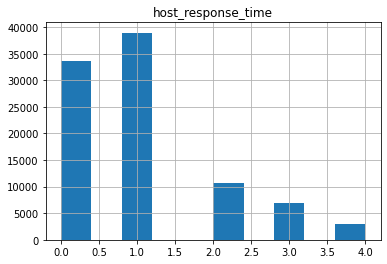

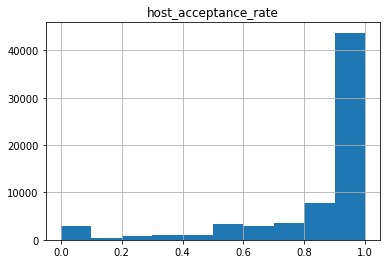

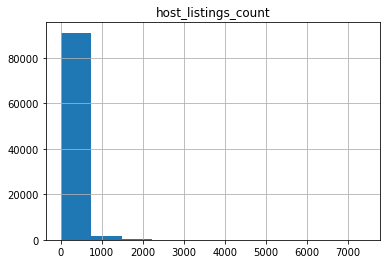

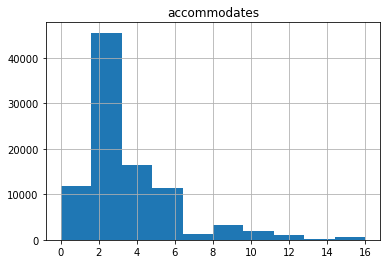

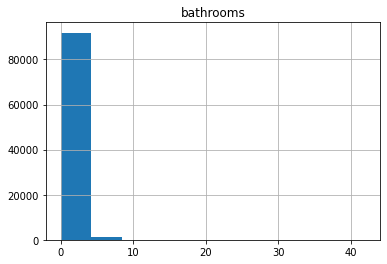

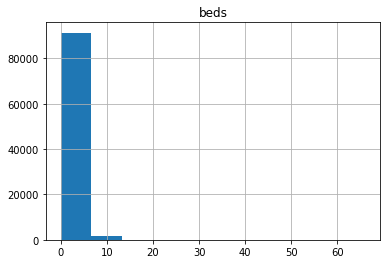

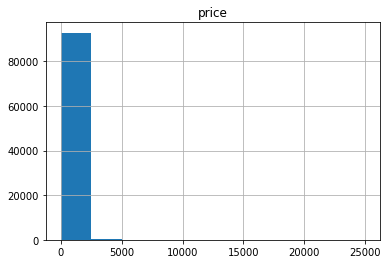

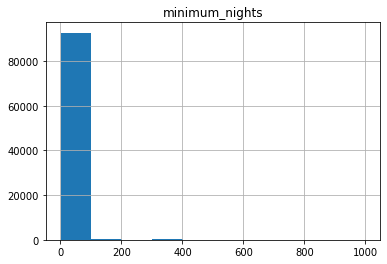

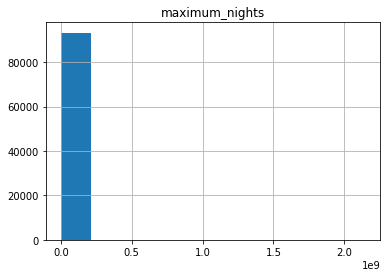

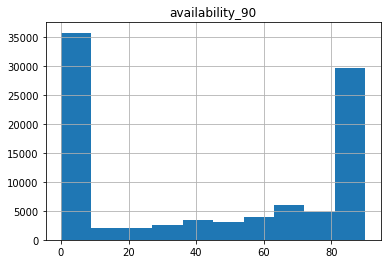

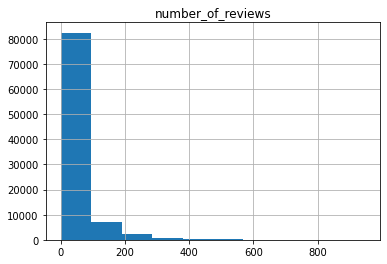

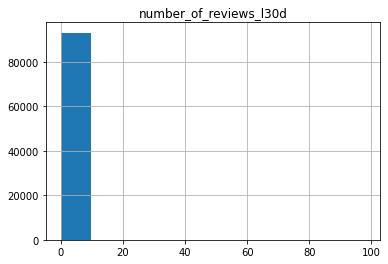

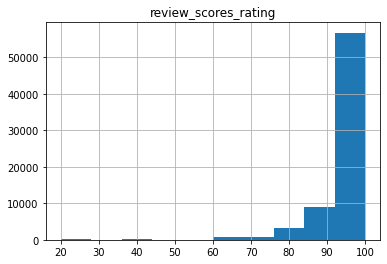

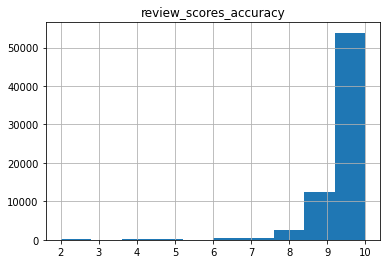

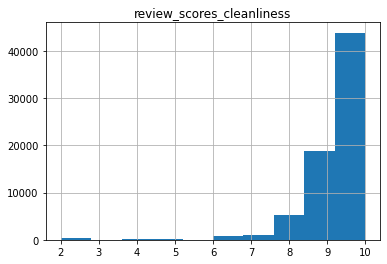

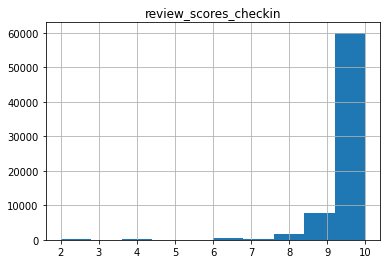

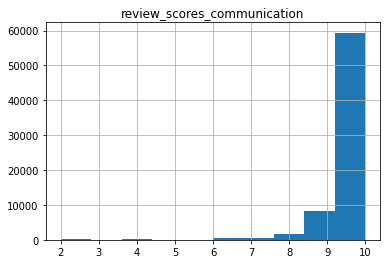

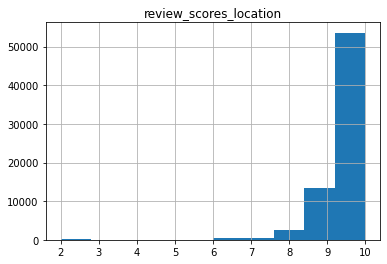

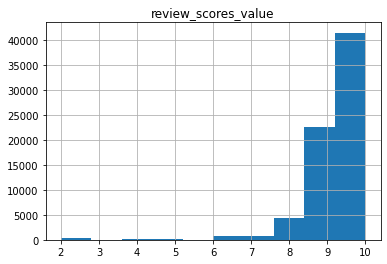

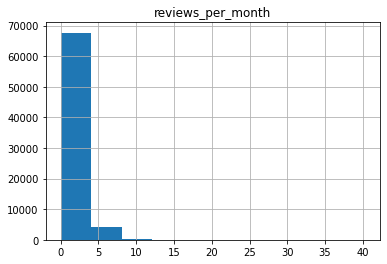

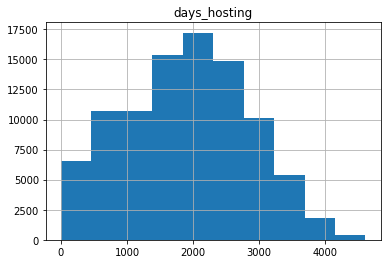

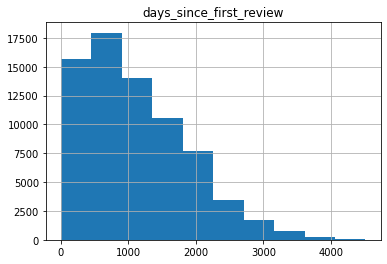

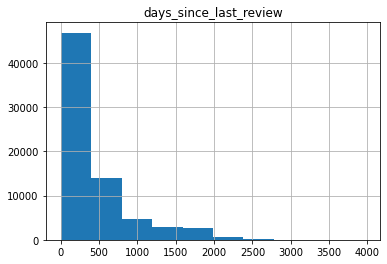

In [38]:
num_data = data.select_dtypes(["float64", "int64", "int32"])
for col in num_data.columns:
    num_data.hist(column=col)

In [39]:
data.sample(5)

,picture_url,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,boston,cambridge,chicago,los angeles,nashville,new york city,san francisco,seattle,kitchen,hangers,carbon_monoxide_alarm,air_conditioning,hair_dryer,shampoo,iron,dedicated_workspace,hot_water,washer,dryer,refrigerator,dishes_and_silverware,fire_extinguisher,microwave,coffee_maker,cooking_basics,stove,oven,bed_linens,free_street_parking,first_aid_kit,private_entrance,free_parking_on_premises,extra_pillows_and_blankets,dishwasher,patio_or_balcony,garden_or_backyard,luggage_dropoff_allowed,lock_on_bedroom_door,elevator,lockbox,bathtub,indoor_fireplace,gym,keypad,shower_gel,host_greets_you,bbq_grill,pool,days_hosting,days_since_first_review,days_since_last_review,been_reviewed,entire apartment,entire house,hotel room,other,private room,alhambra,astoria,bedford-stuyvesant,belltown,bernal heights,beverly grove,beverly hills,burbank,bushwick,castro/upper market,chelsea,chinatown,clinton hill,crown heights,culver city,district 15,district 17,district 19,district 21,district 5,district 6,dorchester,downtown,downtown/civic center,east flatbush,east harlem,east hollywood,east village,echo park,financial district,flatbush,flushing,fort greene,glendale,greenpoint,greenwich village,haight ashbury,harlem,hell's kitchen,hollywood,hollywood hills,hollywood hills west,inglewood,kips bay,koreatown,lake view,lincoln park,logan square,long beach,long island city,loop,los feliz,lower east side,malibu,mar vista,mid-city,mid-wilshire,midtown,mission,murray hill,near north side,near west side,nob hill,noe valley,north hollywood,other neighbourhood,park slope,pasadena,prospect-lefferts gardens,redondo beach,ridgewood,rowland heights,santa monica,sawtelle,sherman oaks,silver lake,soho,south of market,studio city,sunnyside,sunset park,theater district,topanga,torrance,upper east side,upper west side,venice,washington heights,west hollywood,west town,west village,western addition,westlake,westwood,williamsburg,woodside
463,https://a0.muscache.com/pictures/74327731/3e2a1ab3_original.jpg,1,1.000,0.000,3.000,1.000,1.000,5,1.000,2.000,150.000,4,1124,1,49,36,0,99.000,10.000,10.000,10.000,10.000,10.000,10.000,0,0.520,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2505.000,2095.000,105.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2182,https://a0.muscache.com/pictures/6252e03a-e7ab-4d51-8974-c94077b6e166.jpg,4,0.510,0.000,21.000,1.000,1.000,6,2.000,4.000,263.000,30,365,1,90,20,0,95.000,10.000,10.000,10.000,10.000,10.000,9.000,0,0.340,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,2435.000,1741.000,329.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26508,https://a0.muscache.com/pictures/0dad66f0-a446-4ace-b486-e8eedc81d9ab.jpg,1,0.890,0.000,2.000,1.000,1.000,2,1.000,0.000,60.000,2,1125,1,76,27,1,96.000,10.000,10.000,10.000,10.000,9.000,9.000,1,1.650,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1216.000,489.000,6.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14947,https://a0.musca

In [40]:
data.dropna(axis = 0, subset = ["beds", "bathrooms", "days_hosting"], inplace=True)

In [41]:
nulls = data.isna().sum().to_frame().sort_values(0, ascending=False)
nulls

,0
host_acceptance_rate,25618
review_scores_value,22521
review_scores_location,22517
review_scores_checkin,22514
review_scores_accuracy,22489
review_scores_communication,22487
review_scores_cleanliness,22475
review_scores_rating,22139
days_since_first_review,20956
days_since_last_review,20956


In [42]:
null_cols = nulls[nulls[0] > 0].index
data[null_cols] = data[null_cols].fillna(data[null_cols].mean())

In [43]:
data.shape

(92893, 179)

In [44]:
data["picture_url"].to_csv("picture_urls.csv", index=False, mode='w+')
data.drop(columns=["picture_url"], axis=1, inplace=True)

In [45]:
for col in num_data.columns:
    data[col].clip(data[col].min(), data[col].quantile(0.99), inplace=True)

c:\users\cpsch\northeastern\spring 2021\ds4900\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


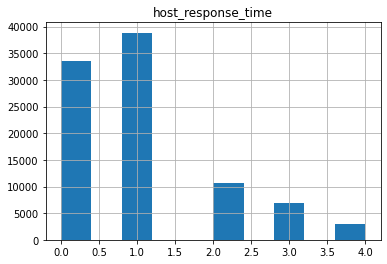

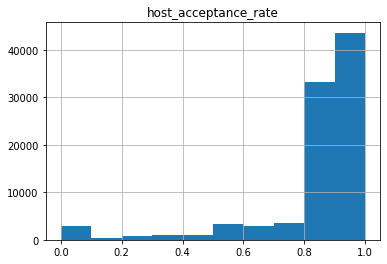

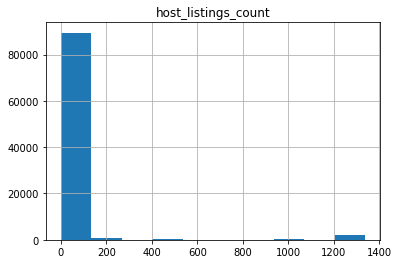

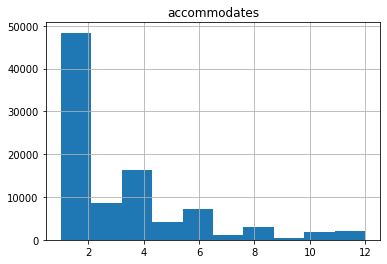

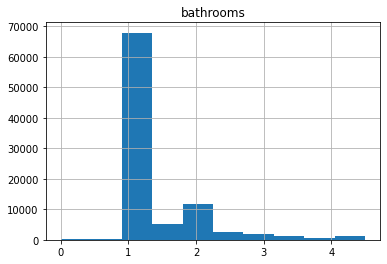

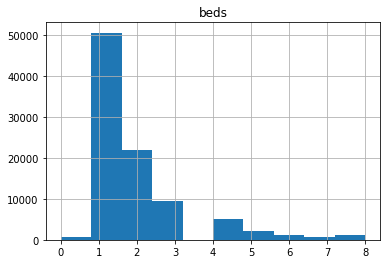

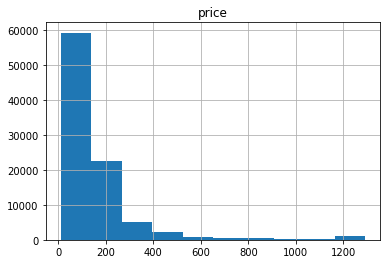

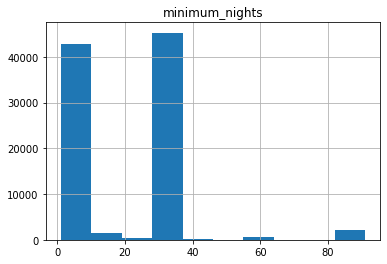

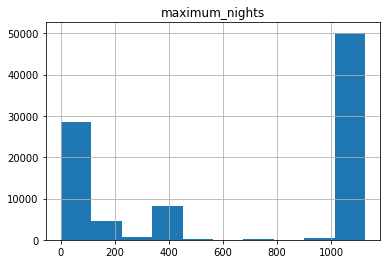

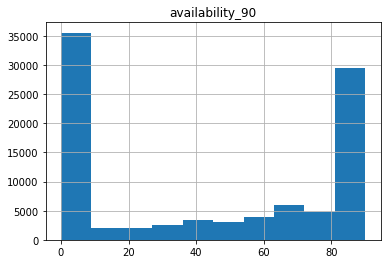

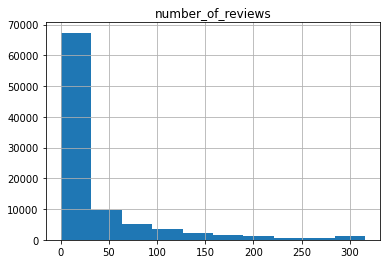

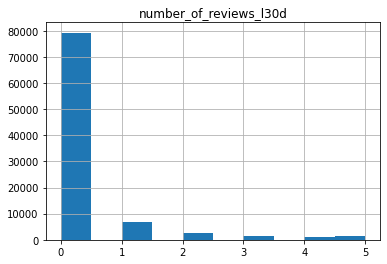

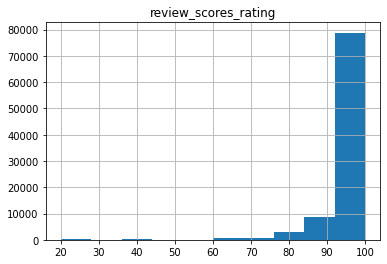

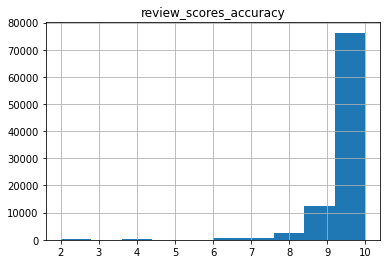

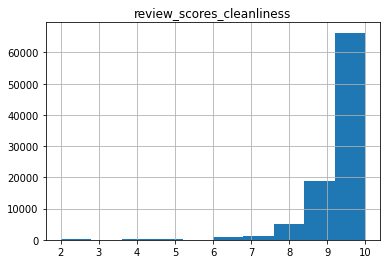

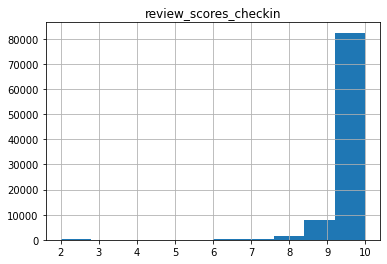

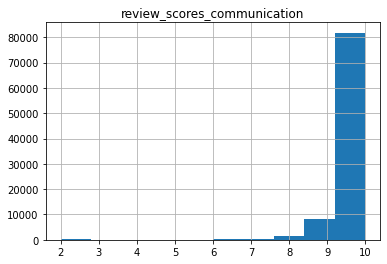

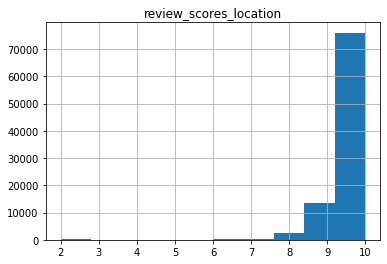

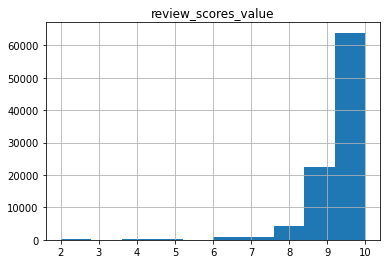

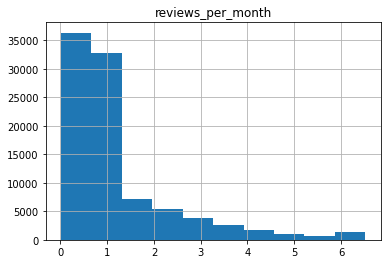

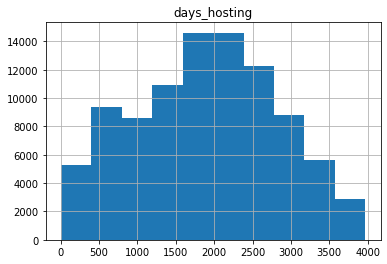

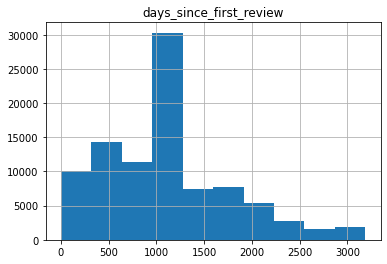

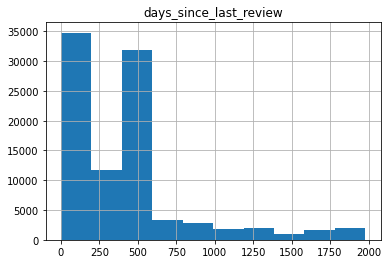

In [46]:
for col in num_data.columns:
    data.hist(column=col)

# Save data as CSV file.

In [47]:
data.to_csv("input_tensor.csv", index=False, mode='w+')